# <font color='CadetBlue'> **ПРАКТИКУМ ПО ПРОГРАММИРОВАНИЮ (1 курс)**

## <font color='CadetBlue'> **ВТОРОЙ СЕМЕСТР**

### <font color='CadetBlue'> **II** —  апрель, май

#### <font color='LightCoral'> **ЗАДАНИЕ 2.** Реализация пакета модулей для манипулирования плоскими фигурами.

Реализовать API, которое позволяет генерировать, преобразовывать и визуализировать последовательность плоских полигонов, представленных в виде картежа картежей (например: `((0,0), (0,1), (1,1), (1,0))` — представление для квадрата). Последовательности представлений полигонов представляют собой итераторы (далее: последовательности полигонов). Решать задачи с использованием функционального стиля программирования, в том числе активно использовать функции из модуля `itertools` и `functools`.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, Polygon, Ellipse, Arc, Path, PathPatch
import numpy as np
from math import cos, sin, pi, radians, copysign
import itertools
from shapely.geometry import Polygon as Polygon_shapely
from shapely.geometry.point import Point as Point_shapely
from functools import reduce

Суммарная сложность дополнительных заданий должна быть не менее 5.

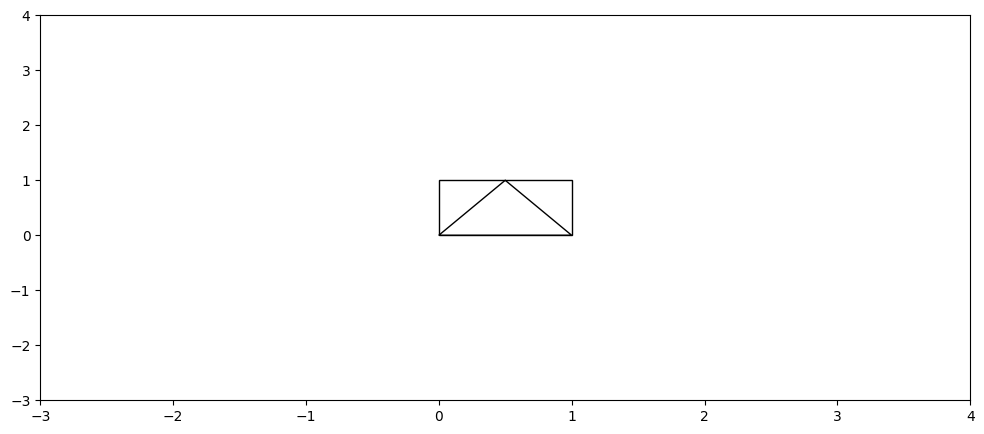

In [ ]:
x = np.array([[[1, 2, 3], [4, 5, 6]]])  # 3D массив формы (1, 2, 3)
x.reshape(x.shape[1:] if len(x.shape) >= 3 else x.shape)

def plot_poligons(poligons: list):
    # Инициализация границ
    xmin, xmax, ymin, ymax = 1e10, -1e10, 1e10, -1e10

    # Обработка случая с одним полигоном
    if len(poligons[0]) == 2:
        poligons = [poligons] * 2

    bounds = []
    for poligon in poligons:
        poligon = np.array(poligon)
        poligon.reshape(poligon.shape[1:] if len(poligon.shape) >= 3 else poligon.shape)
        bounds.append(Polygon_shapely(poligon).bounds)  # Получение границ полигона

    # Вычисление общих границ
    xmin, ymin = np.min(bounds, axis=0)[:2]
    xmax, ymax = np.max(bounds, axis=0)[2:]

    # Настройка графика
    plt.figure(figsize=(12, 5))
    plt.xlim(xmin - 3, xmax + 3)
    plt.ylim(ymin - 3, ymax + 3)

    ax = plt.gca()  # Текущие оси

    # Отрисовка полигонов
    for poligon in poligons:
        if len(poligon) == 1:
            poligon = poligon[0]
        p = Polygon(poligon, fill=False)
        ax.add_patch(p)

    plt.show()

# Пример использования
poligon_1 = [(0, 0), (0, 1), (1, 1), (1, 0)]
poligon_2 = [(0, 0), (0.5, 1), (1, 0)]

poligons = [poligon_1, poligon_2]
plot_poligons(poligons)

1.	Реализовать функцию визуализации последовательности полигонов, представленной в виде итератора (например, можно использовать визуализацию с помощью библиотеки `matplotlib`, см. пример: [ссылка](https://matplotlib.org/stable/gallery/shapes_and_collections/patch_collection.html#sphx-glr-gallery-shapes-and-collections-patch-collection-py)).

<font color="Crimson">**обязательная часть**

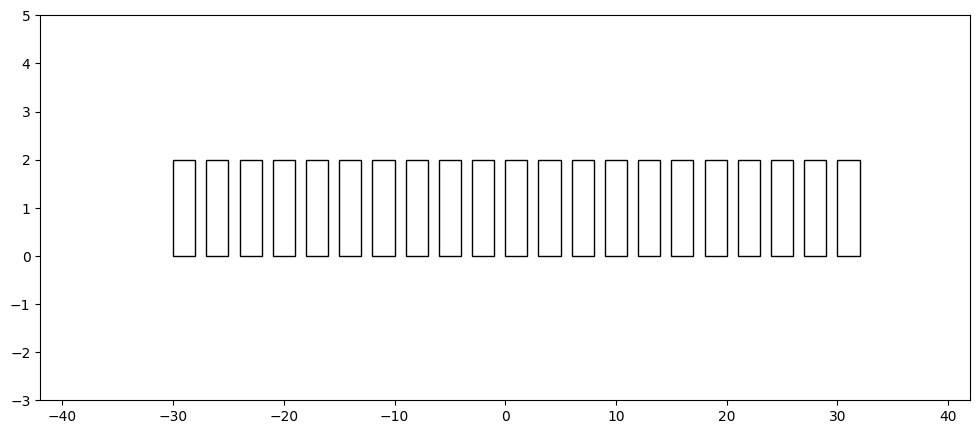

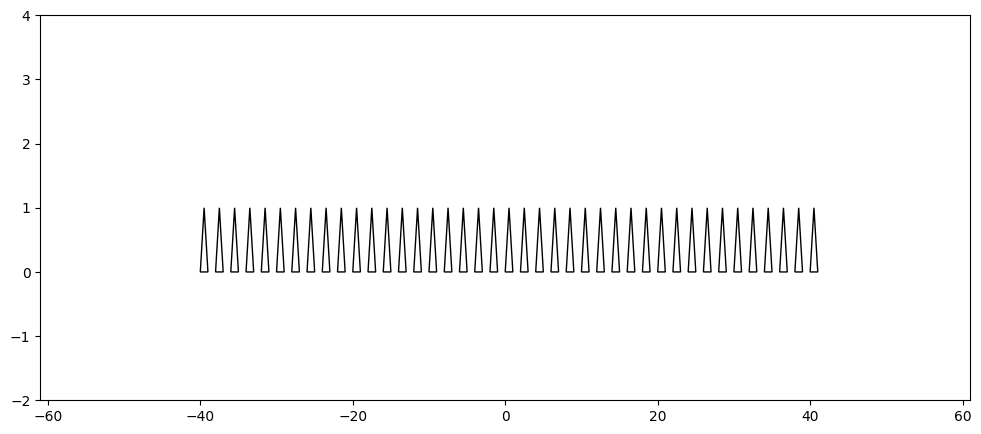

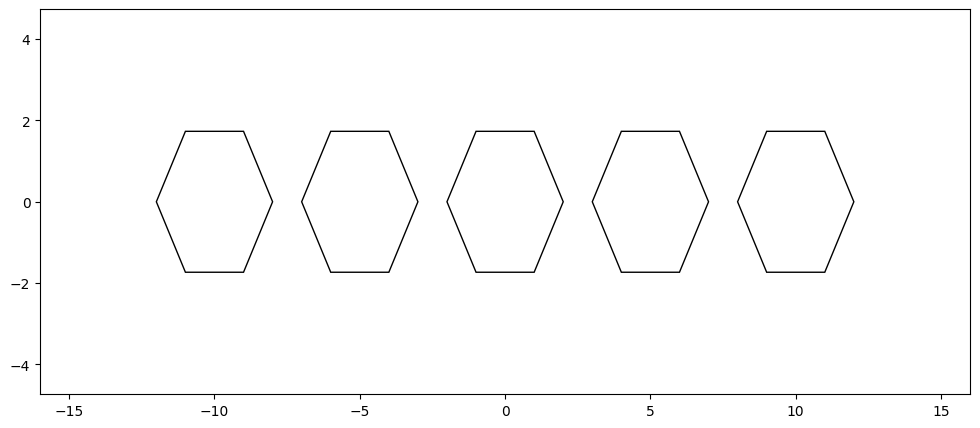

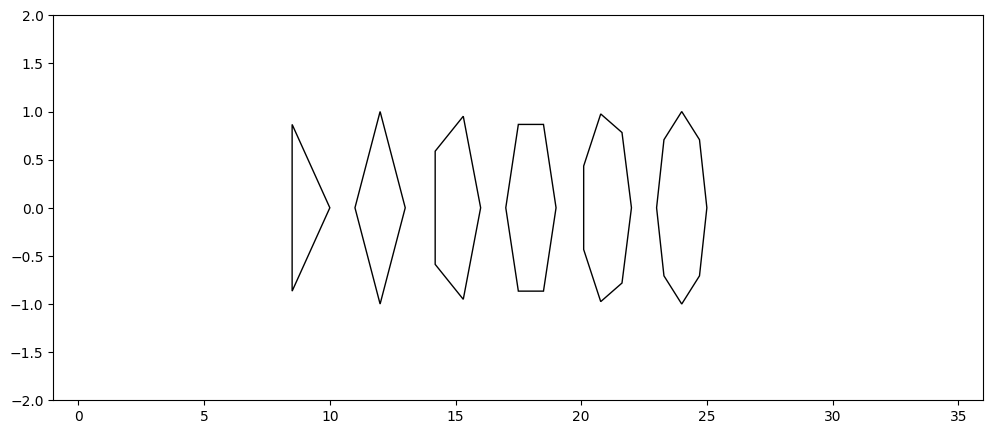

In [ ]:
# Функция для создания и отображения прямоугольников
def get_rectangle(rectangle: list, spacing: float = 1., n_figures: int = 10, plot: bool = True):
    rectangle_length , _ = abs(np.array(rectangle[2]) - np.array(rectangle[0]))  # Вычисление длины прямоугольника

    x_space = (rectangle_length + 2 * spacing) * n_figures  # Общее пространство для всех прямоугольников
    x_min = rectangle[0][0] - (x_space + rectangle_length)  # Минимальная граница по X
    x_max = rectangle[0][0] + (x_space + rectangle_length)  # Максимальная граница по X

    poligons = []
    rectangle = np.array(rectangle)  # Преобразование в numpy массив
    for n in range(-n_figures, n_figures + 1):  # Создание копий прямоугольника со смещением
        new_poligon = rectangle.copy()
        new_poligon[:, 0] = new_poligon[:, 0] + (rectangle_length + spacing) * n
        poligons.append(new_poligon)

    if not plot:  # Возврат без отрисовки, если нужно
        return poligons

    # Настройка и отображение графика
    plt.figure(figsize=(12, 5))
    plt.xlim(x_min, x_max)
    plt.ylim(rectangle[0][1] - 3, rectangle[2][1] + 3)

    ax = plt.gca()  # Получение текущих осей

    for poligon in poligons:  # Отрисовка всех прямоугольников
        p = Polygon(poligon, fill=False)
        ax.add_patch(p)

    plt.show()

# Пример вызова функции для прямоугольника
get_rectangle([(0, 0), (0, 2), (2, 2), (2, 0)])


# Функция для создания и отображения треугольников
def get_triangle(triangle: list, spacing: float = 1., n_figures: int = 20, plot: bool = True):
    triangle_length = max(abs(triangle[1][0] - triangle[0][0]), abs(triangle[2][0] - triangle[0][0]))  # Ширина треугольника
    triangle_height = max(abs(triangle[1][1] - triangle[0][1]), abs(triangle[2][1] - triangle[0][1]))  # Высота треугольника

    x_space = (triangle_length + 2 * spacing) * n_figures  # Общее пространство
    x_min = triangle[0][0] - (x_space + triangle_length)  # Границы по X
    x_max = triangle[0][0] + (x_space + triangle_length)

    poligons = []
    triangle = np.array(triangle)  # Преобразование в numpy массив
    for n in range(-n_figures, n_figures + 1):  # Создание копий треугольника
        new_poligon = triangle.copy()
        new_poligon[:, 0] = new_poligon[:, 0] + (triangle_length + spacing) * n
        poligons.append(new_poligon)

    if not plot:  # Возврат без отрисовки
        return poligons

    # Настройка и отображение графика
    plt.figure(figsize=(12, 5))
    plt.xlim(x_min, x_max)
    plt.ylim(triangle_height - 3, triangle_height + 3)

    ax = plt.gca()  # Получение осей

    for poligon in poligons:  # Отрисовка треугольников
        p = Polygon(poligon, fill=False)
        ax.add_patch(p)

    plt.show()

# Пример вызова для треугольника
triangle = [(0, 0), (0.5, 1), (1, 0)]
get_triangle(triangle)

# Функция для создания и отображения шестиугольников
def get_hexagon(hexagon: list, spacing: float = 1., n_figures: int = 2):
    hexagon_length = (hexagon_sorted := sorted(hexagon))[-1][0] - hexagon_sorted[0][0]  # Ширина шестиугольника

    x_space = (hexagon_length + 2 * spacing) * n_figures  # Общее пространство
    x_min = triangle[0][0] - (x_space + hexagon_length)  # Границы по X
    x_max = triangle[0][0] + (x_space + hexagon_length)

    # Настройка графика
    plt.figure(figsize=(12, 5))
    plt.xlim(x_min, x_max)
    plt.ylim((hexagon_sorted := sorted(hexagon, key=lambda x: x[1]))[0][1] - 3, hexagon_sorted[-1][1] + 3)  # Границы по Y

    poligons = []
    hexagon = np.array(hexagon)  # Преобразование в numpy массив
    for n in range(-n_figures, n_figures + 1):  # Создание копий шестиугольника
        new_poligon = hexagon.copy()
        new_poligon[:, 0] = new_poligon[:, 0] + (hexagon_length + spacing) * n
        poligons.append(new_poligon)

    ax = plt.gca()  # Получение осей

    for poligon in poligons:  # Отрисовка шестиугольников
        p = Polygon(poligon, fill=False)
        ax.add_patch(p)

    plt.show()

# Создание и отображение шестиугольника
hexagon = []
R = 2  # Радиус
x0, y0 = 0, 0  # Центр

for i in range(6):  # Генерация координат вершин
    hexagon.append((x0 + R * cos(2 * pi * i / 6), y0 + R * sin(2 * pi * i / 6)))

hexagon  # Вывод координат
get_hexagon(hexagon)  # Отрисовка

# Функция для генерации координат правильного n-угольника
def get_polygon_coords(n: int, R: float = 2., x0: float = 0, y0: float = 0,):
    polygon = []

    for i in range(n):  # Вычисление координат каждой вершины
        polygon.append((x0 + R * cos(2 * pi * i / n), y0 + R * sin(2 * pi * i / n)))

    return polygon

# Функция для создания и отображения набора правильных многоугольников
def get_polygons(R: float = 2., spacing: float = 1., n_figures: int = 2):
    x_space = (2 * R + 2 * spacing) * n_figures  # Общее пространство
    x_min = R - 2  # Границы по X
    x_max = 2 * R + (x_space + 2 * R)

    # Настройка графика
    plt.figure(figsize=(12, 5))
    plt.xlim(x_min, x_max)
    plt.ylim(-R - 1, R + 1)  # Границы по Y

    poligons = []
    for n in range(3, n_figures + 1):  # Создание многоугольников от треугольника до n_figures-угольника
        polygon = np.array(get_polygon_coords(n, R))  # Получение координат
        polygon[:, 0] = polygon[:, 0] + (2 * R + spacing) * n  # Смещение по X
        poligons.append(polygon)

    ax = plt.gca()  # Получение осей

    for poligon in poligons:  # Отрисовка всех многоугольников
        p = Polygon(poligon, fill=False)
        ax.add_patch(p)

    plt.show()

# Пример вызова для набора многоугольников
get_polygons(R=1, n_figures=8)

2.	Реализовать функции, генерирующие бесконечную последовательность непересекающихся полигонов с различающимися координатами (например, «ленту», см. рис. 2):

* прямоугольников (`gen_rectangle`);

* треугольников (`gen_triangle`);

* правильных шестиугольников (`gen_hexagon`).

* с помощью данных функций используя функции из модуля `itertools` сгенерировать семь фигур, включающих как прямоугольники, так и треугольники и шестиугольники, визуализировать результат.

<font color="Crimson">**обязательная часть**


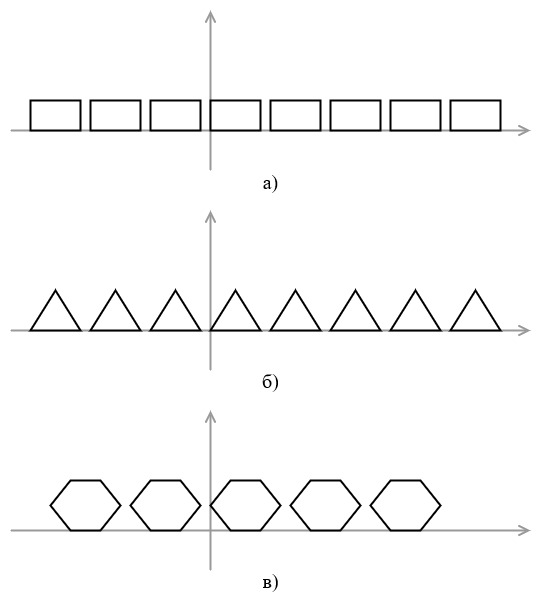

Рисунок 2 — Последовательности непересекающихся полигонов

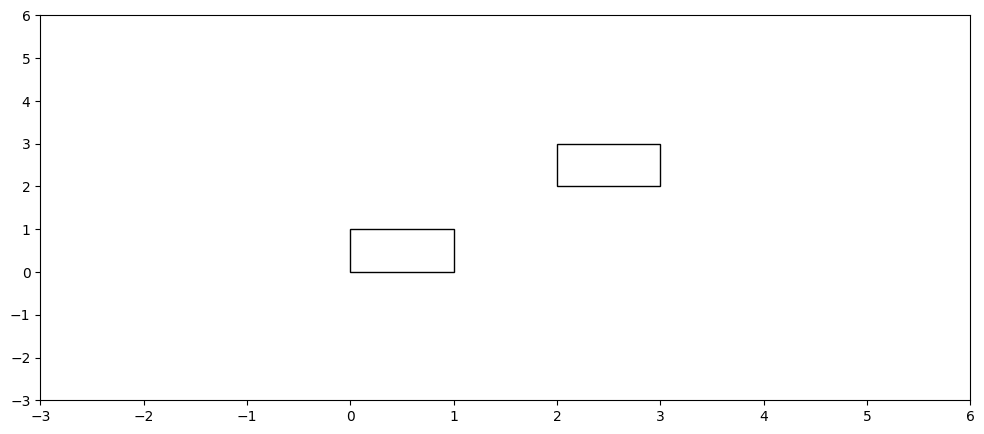

In [ ]:
# Функция для перемещения координат на заданное расстояние alpha
def tr_translate(coord, alpha: float = 2.):
    return np.array(coord) + alpha  # Преобразуем координаты в numpy array и добавляем смещение

# Исходный полигон (квадрат)
poligon_1 = [(0, 0), (0, 1), (1, 1), (1, 0)]

# Создаем второй полигон, смещая все точки первого на alpha=2
poligon_2 = list(map(tr_translate, poligon_1))  # Применяем tr_translate к каждой точке poligon_1

# Список полигонов для отрисовки
poligons = [poligon_1, poligon_2]

# Отрисовываем полигоны
plot_poligons(poligons)

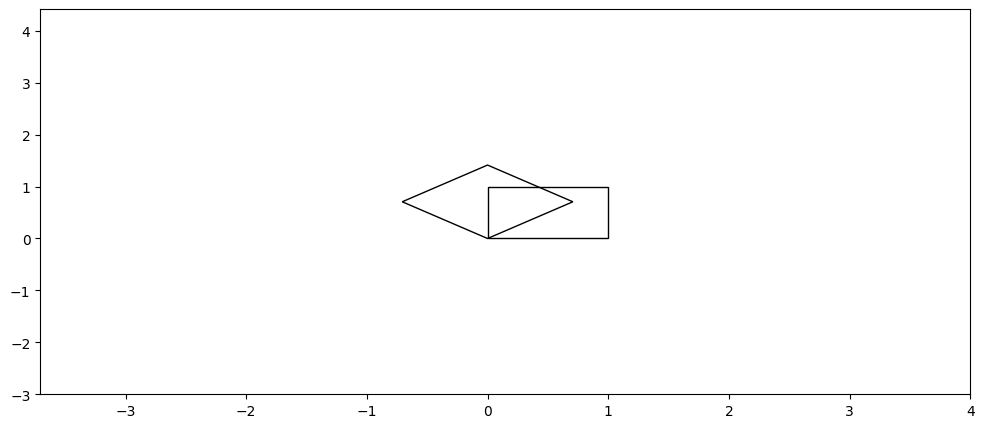

In [ ]:
# Функция для вращения точки на угол alpha (в градусах)
def tr_rotate(coord, alpha: float = 45.):
    # Преобразуем координаты в комплексное число для удобства вращения
    coord_complex = complex(*coord)
    # Создаем комплексное число, представляющее поворот (используем тригонометрические функции)
    rotation = complex(cos(radians(alpha)), sin(radians(alpha)))
    # Умножаем координаты на поворот (эквивалентно матричному повороту)
    new_coords = coord_complex * rotation
    return (new_coords.real, new_coords.imag)

# Исходный квадратный полигон
poligon_1 = [(0, 0), (0, 1), (1, 1), (1, 0)]

# Создаем повернутую версию полигона (каждая точка поворачивается на 45 градусов)
poligon_2 = list(map(tr_rotate, poligon_1))  # Применяем tr_rotate к каждой точке poligon_1

# Собираем оба полигона в список для отрисовки
poligons = [poligon_1, poligon_2]

# Отрисовываем оригинальный и повернутый полигоны
plot_poligons(poligons)

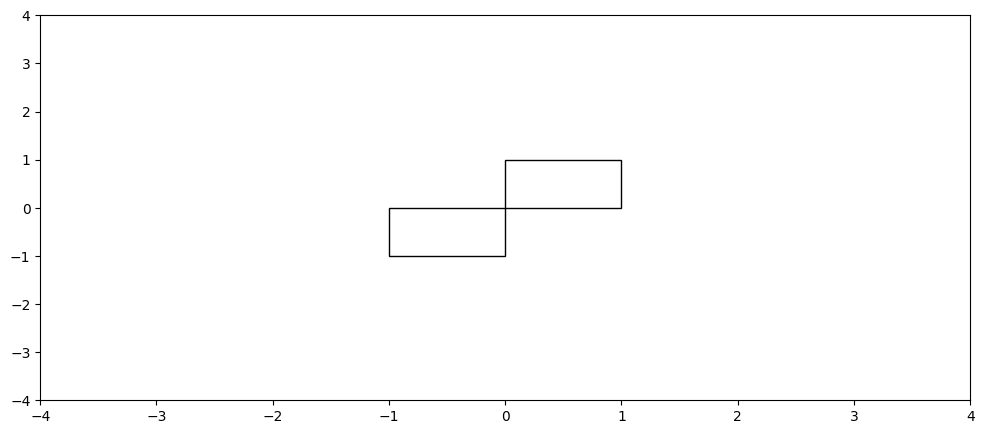

In [ ]:
# Функция для создания симметричного отражения точки относительно начала координат (0,0)
def tr_symmetry(coord):
    return -np.array(coord)  # Инвертируем знаки всех координат точки

# Исходный квадратный полигон (координаты вершин)
poligon_1 = [(0, 0), (0, 1), (1, 1), (1, 0)]

# Создаем симметричный полигон, отражая каждую точку через tr_symmetry
poligon_2 = list(map(tr_symmetry, poligon_1))  # Применяем преобразование симметрии к каждой точке

# Собираем оба полигона в список для визуализации
poligons = [poligon_1, poligon_2]

# Отрисовываем оригинальный и симметричный полигоны
plot_poligons(poligons)

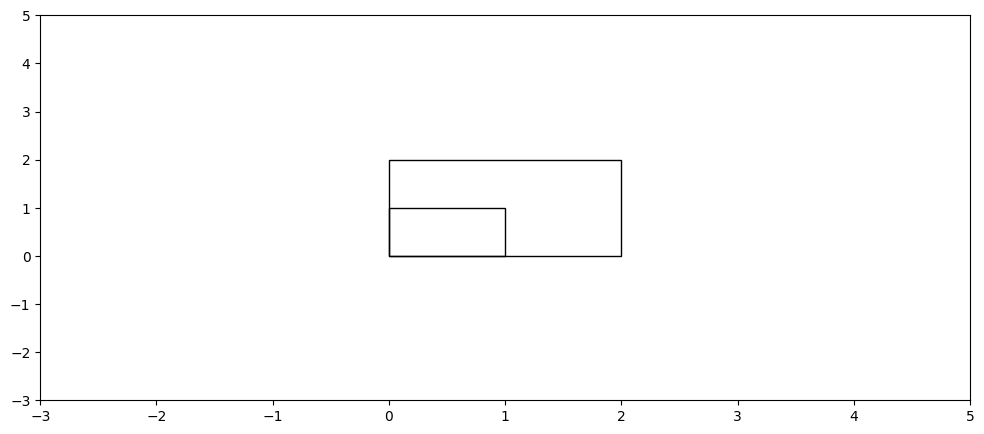

In [ ]:
# Функция для выполнения гомотетии (масштабирования) с коэффициентом alpha
def tr_homotety(coord, alpha: float = 2.):
    return np.array(coord) * alpha  # Умножаем координаты на коэффициент масштабирования

# Исходный квадратный полигон (координаты вершин)
poligon_1 = [(0, 0), (0, 1), (1, 1), (1, 0)]

# Создаем масштабированную копию полигона с коэффициентом 2
poligon_2 = list(map(tr_homotety, poligon_1))  # Применяем преобразование к каждой точке

# Собираем оба полигона (оригинал и масштабированный) для визуализации
poligons = [poligon_1, poligon_2]

# Отрисовываем полигоны для сравнения
plot_poligons(poligons)

3.	Реализовать операции:

* параллельный перенос (`tr_translate`);

* поворот (`tr_rotate`);

* симметрия (`tr_symmetry`);

* гомотетия (`tr_homothety`);

которые можно применить к последовательности полигонов с помощью функции `map`.

<font color="Crimson">**обязательная часть**


4.	С помощью данных функций создать и визуализировать (рис. 3):

* три параллельных «ленты» из последовательностей полигонов, расположенных под острым углом к оси абсцисс;

* две пересекающихся «ленты» из последовательностей полигонов, пересекающихся не в начале координат;

* две параллельных ленты треугольников, ориентированных симметрично друг к другу;

* последовательность четырехугольников в разном масштабе, ограниченных двумя прямыми, пересекающимися в начале координат.

<font color="Crimson">**обязательная часть**

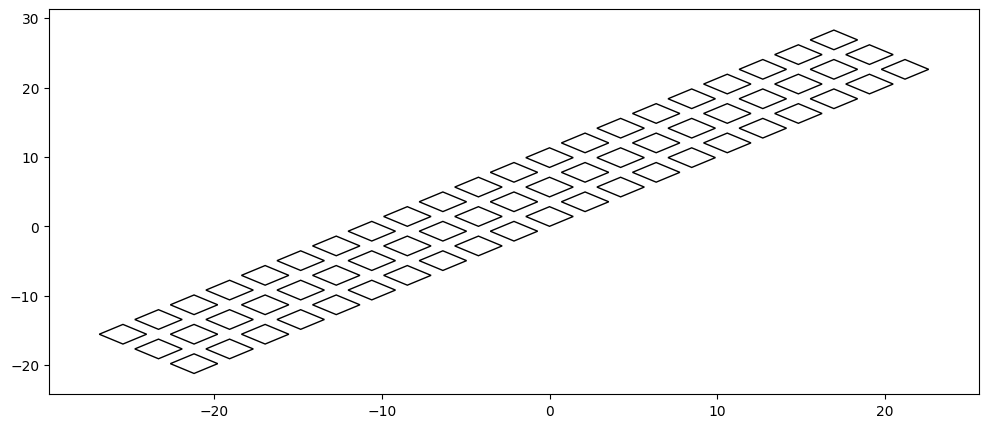

In [ ]:
# Функция для смещения массива точек по оси Y на значение alpha
def tr_translate_ax(array, alpha: float = 3.):
    array = np.array(array)  # Преобразуем в numpy массив
    array[:, 1] = array[:, 1] + alpha  # Смещаем только Y-координаты
    return array

# Функция для поворота массива точек (применяет tr_rotate к каждой точке)
def tr_rotate_arr(array):
    return list(map(tr_rotate, array))  # Применяем поворот ко всем точкам массива

# Исходный прямоугольник (координаты вершин)
rect = [(0, 0), (0, 2), (2, 2), (2, 0)]

# Генерируем массив прямоугольников (без отрисовки)
rect_arr0 = get_rectangle(rect, plot=False)  # Базовый набор прямоугольников

# Создаем смещенные копии (по оси Y)
rect_arr1 = list(map(tr_translate_ax, rect_arr0))  # Первое смещение на 3 единицы вверх
rect_arr2 = list(map(tr_translate_ax, rect_arr1))  # Второе смещение (еще +3)

# Объединяем все наборы прямоугольников
rect_arr = rect_arr0 + rect_arr1 + rect_arr2

# Применяем поворот ко всем прямоугольникам
rot_rect_arr = list(map(tr_rotate_arr, rect_arr))

# Отрисовываем результат
plot_poligons(rot_rect_arr)

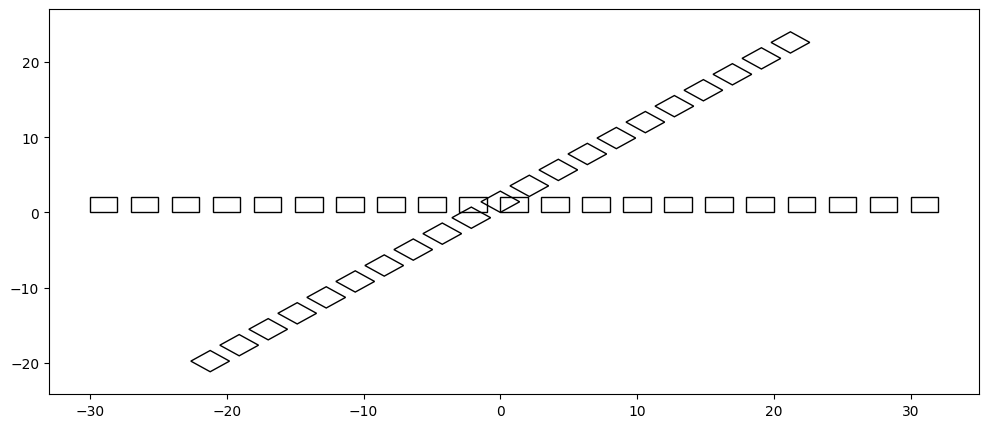

In [ ]:
# Исходный прямоугольник (координаты вершин)
rect = [(0, 0), (0, 2), (2, 2), (2, 0)]

# Генерируем массив прямоугольников (без отрисовки)
rect_arr0 = get_rectangle(rect, plot=False)

# Создаем повернутые копии всех прямоугольников из rect_arr0
rot_rect_arr0 = list(map(tr_rotate_arr, rect_arr0))

# Объединяем оригинальные и повернутые прямоугольники
rect_arr = rect_arr0 + rot_rect_arr0

# Отрисовываем результат:
plot_poligons(rect_arr)

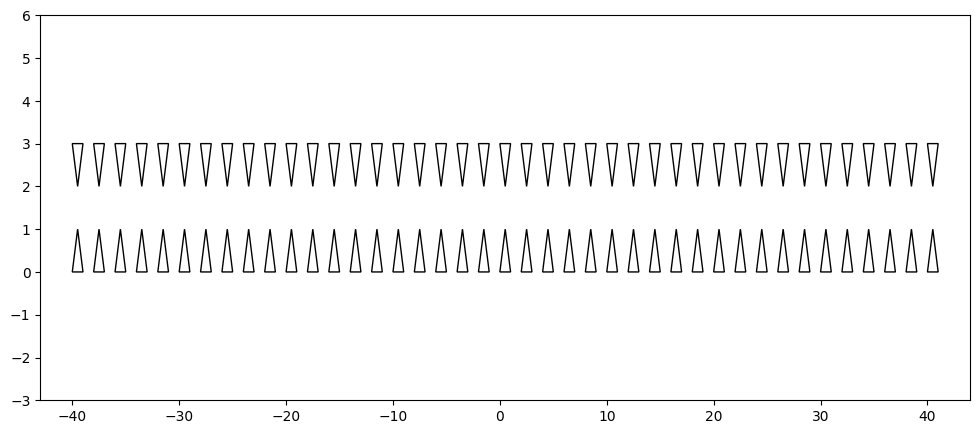

In [ ]:
# Функция для отражения фигуры относительно оси X (симметрия по Y)
def tr_symmetry_y(arr):
    arr = np.array(arr)  # Преобразуем в numpy массив
    arr[:, 1] = -arr[:, 1]  # Инвертируем Y-координаты (зеркальное отражение)
    return arr

# Исходный треугольник (координаты вершин)
triangle = [(0, 0), (0.5, 1), (1, 0)]

# Генерируем массив треугольников (без отрисовки)
triangles = get_triangle(triangle, plot=False)

# Создаем симметричные копии всех треугольников (отраженные по оси X)
triangles_sym = list(map(tr_symmetry_y, triangles))

# Смещаем отраженные треугольники вверх на 3 единицы (по умолчанию в tr_translate_ax)
triangles_sym = list(map(tr_translate_ax, triangles_sym))

# Объединяем оригинальные и отраженные+смещенные треугольники
arrs = triangles + triangles_sym

# Отрисовываем результат:
plot_poligons(arrs)

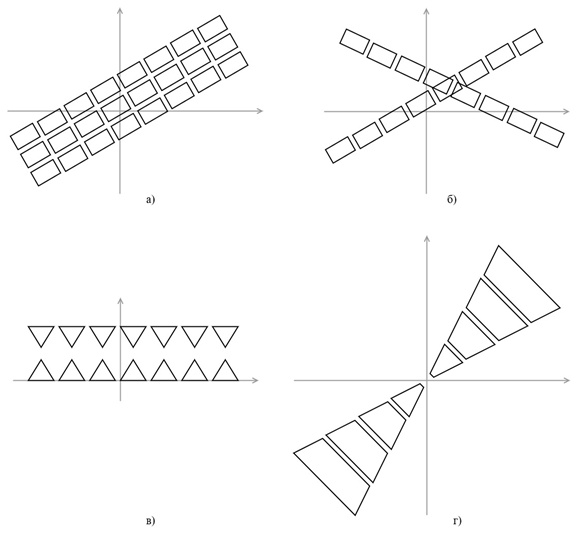

Рисунок 3 — Реализация операции параллельного переноса (а), поворота (б),
симметрии (в) и гомотетии (г)

5.	Реализовать операции:

* фильтрации фигур, являющихся выпуклыми многоугольниками (`flt_convex_polygon`);

* фильтрации фигур, имеющих хотя бы один угол, совпадающий с заданной точкой (`flt_angle_point`);

* фильтрации фигур, имеющих площадь меньше заданной (`flt_square`);

* фильтрации фигур, имеющих кратчайшую сторону меньше заданного значения (`flt_short_side`);

* фильтрации выпуклых многоугольников, включающих заданную точку (внутри многоугольника) (`flt_point_inside`);

* фильтрации выпуклых многоугольников, включающих любой из углов заданного многоугольника (`flt_polygon_angles_inside`);

которые можно применить к последовательности полигонов с помощью функции `filter`.

<font color="Crimson">**обязательная часть: 2 пункта<br>4 пункта — сложность 1<br>6 пунктов — сложность 2**


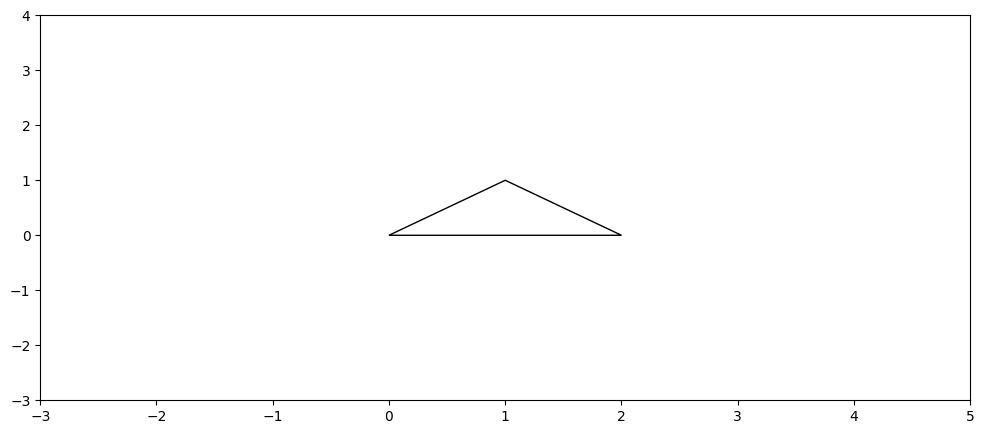

In [ ]:
# Функция поворота точки на заданный угол alpha (в градусах)
def tr_rotate(coord, alpha: float = 135.):
    coord_complex = complex(*coord)  # Преобразуем координаты в комплексное число
    # Создаем комплексное число для поворота (используя тригонометрические функции)
    rotation_factor = complex(cos(radians(alpha)), sin(radians(alpha)))
    # Применяем поворот умножением комплексных чисел
    new_coords = coord_complex * rotation_factor
    return (new_coords.real, new_coords.imag)  # Возвращаем новые координаты

# Функция масштабирования массива точек
def tr_homotety_arr(arr, alpha: float = 2.):
    coord = []
    for c in arr:
        # Масштабируем каждую точку и преобразуем в список
        coord.append(tr_homotety(c, alpha).tolist())
    return coord

# Функция вычисления длин сторон четырехугольника
def calc_sides(arr):
    arr = np.array(arr)  # Преобразуем в numpy массив
    short = np.linalg.norm(arr[2] - arr[1])  # Вычисляем короткую сторону
    long = np.linalg.norm(arr[0] - arr[3])   # Вычисляем длинную сторону
    return short, long

# Функция проверки выпуклости полигона
def is_convex(polygon):
    # Вспомогательная функция для вычисления знака векторного произведения
    def vektorn_proizv_sign(p1, p2, p3):
        return (p2[0] - p1[0])*(p3[1] - p1[1]) - (p2[1] - p1[1])*(p3[0] - p1[0])

    signs = []
    for i in range(len(polygon)):
        # Вычисляем знак векторного произведения для каждой тройки вершин
        sign = copysign(1, vektorn_proizv_sign(
            polygon[i],
            polygon[(i + 1) % len(polygon)],
            polygon[(i + 2) % len(polygon)]
        ))
        signs.append(sign)

    # Полигон выпуклый, если все знаки одинаковы
    return all(s == signs[0] for s in signs)

# Функция фильтрации выпуклых полигонов
def flt_convex_polygon(polygons):
    return list(filter(is_convex, polygons))  # Оставляем только выпуклые полигоны

# Пример использования: два полигона (один выпуклый, один нет)
polygons = [
    [(0, 0), (-1, 0), (0.5, 0.5), (0, 1)],  # Невыпуклый четырехугольник
    [(0, 0), (2, 0), (1, 1)]                 # Выпуклый треугольник
]

# Фильтруем и оставляем только выпуклые полигоны
convex_polygons = flt_convex_polygon(polygons)

# Отрисовываем результат (только выпуклые полигоны)
plot_poligons(convex_polygons)

Многоугольники с углом в заданной точке:
[[(0, 0), (3, 0), (3, 2), (0, 2)]]


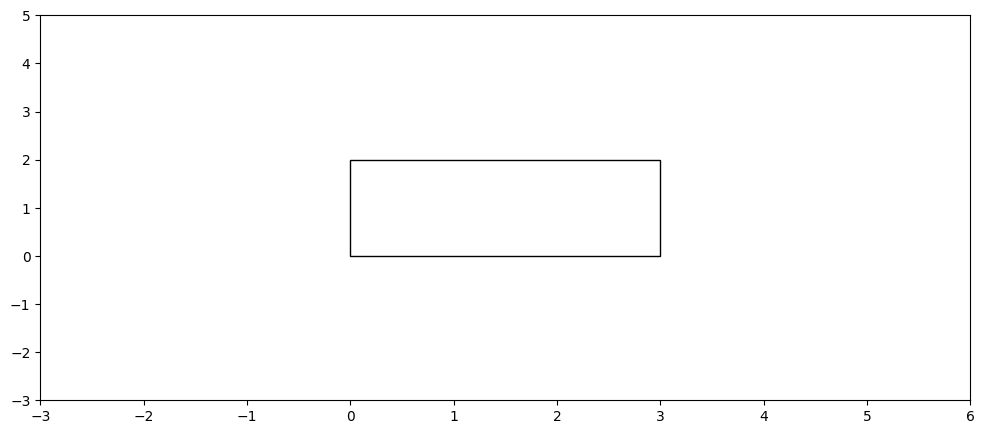

In [ ]:
# Функция фильтрации многоугольников, содержащих заданную точку в качестве вершины
def flt_angle_point(polygons, point):
    return filter(lambda p: point in p, polygons)  # Фильтруем многоугольники, содержащие точку point

# Определяем два многоугольника:
rectangles = [(0, 0), (3, 0), (3, 2), (0, 2)]  # Прямоугольник с вершиной (0,0)
triangles = [(4, 0), (6, 2), (5, 3)]          # Треугольник без точки (0,0)

# Применяем фильтрацию для поиска многоугольников, содержащих точку (0,0)
filtered = list(flt_angle_point([rectangles, triangles], (0, 0)))

# Выводим результат фильтрации
print("Многоугольники с углом в заданной точке:")
print(filtered)  # Выведет только прямоугольник, так как он содержит (0,0)

# Отрисовываем найденные многоугольники (в данном случае только прямоугольник)
plot_poligons(filtered)

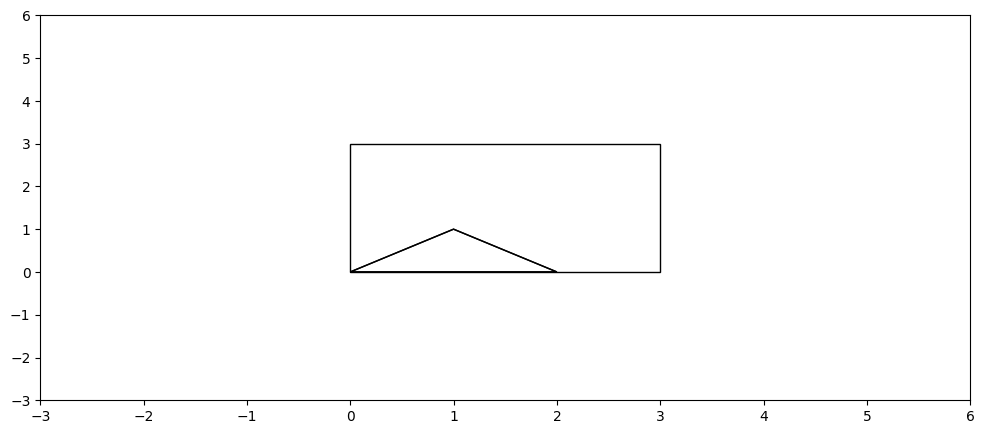

In [ ]:
# Функция вычисления площади полигона по формуле шнурования (Shoelace formula)
def polygon_area(polygon):
    return 0.5 * abs(sum(x0 * y1 - x1 * y0  # Сумма произведений координат
                      for (x0, y0), (x1, y1)  # Для каждой пары соседних вершин
                      in zip(polygon, polygon[1:] + polygon[:1])))  # Замыкаем полигон

# Функция фильтрации полигонов по минимальной площади
def flt_square(polygons, min_area):
    return filter(lambda p: polygon_area(p) >= min_area, polygons)  # Оставляем полигоны с площадью >= min_area

# Список тестовых полигонов:
polygons = [
    [(0, 0), (3, 0), (3, 3), (0, 3)],
    [(0, 0), (2, 0), (1, 1)],
    [(0, 0), (2, 0), (1, 1)]
]

# Фильтруем полигоны (в данном случае min_area=0, поэтому все пройдут фильтр)
large_hexagons = list(flt_square(itertools.islice(polygons, 3), 0))

# Отрисовываем все полигоны (фильтр не исключил ни одного, так как min_area=0)
plot_poligons(polygons)

6.	С помощью данных функций реализовать и визуализировать:

* фильтрацию фигур, созданных в рамках пункта 4.4; подобрать параметры так, чтобы на выходе было получено шесть фигур;

* используя функции генерации из п. 2 и операции из п. 3, создать не менее 15 фигур, которые имеют различный масштаб, и выбрать из них (подбором параметра фильтрации) не более четырех фигур, имеющих кратчайшую сторону меньше заданного значения;

* используя функции генерации из п. 2 и операции из п. 3, создать не менее 15 фигур имеющих множество пересечений и обеспечить фильтрацию пересекающихся фигур.

<font color="Crimson">**обязательная часть: 1 пункт<br>3 пункта — сложность 1**

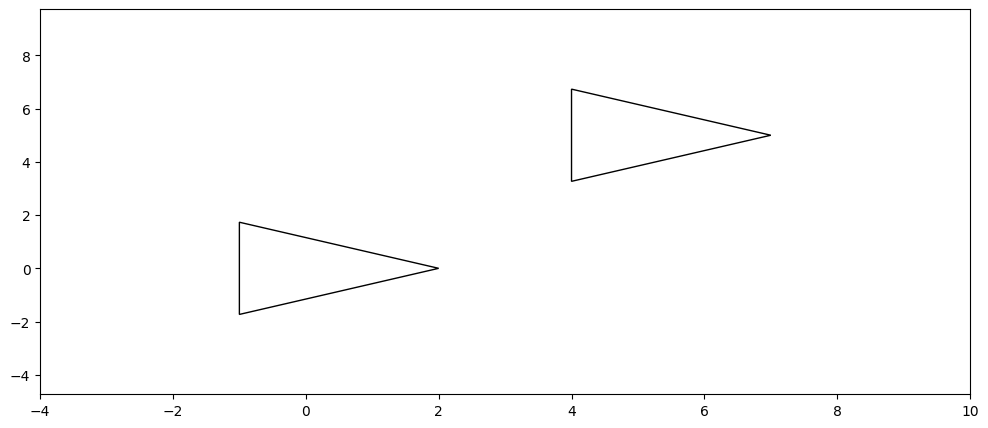

In [ ]:
# Декоратор для автоматического смещения полигона
def tr_translate_wr(func):
    def wrapper(*args, **kwargs):
        polygon = func(*args, **kwargs)  # Получаем исходный полигон
        return tr_translate(polygon, 5)  # Смещаем полигон на 5 единиц
    return wrapper

# Функция генерации правильного n-угольника с автоматическим смещением (декорирована)
@tr_translate_wr
def get_polygon_coords_with_wr(n: int, R: float = 2., x0: float = 0, y0: float = 0):
    polygon = []
    for i in range(n):
        # Вычисляем координаты вершин n-угольника
        polygon.append((x0 + R * cos(2 * pi * i / n), y0 + R * sin(2 * pi * i / n)))
    return polygon

# Генерируем:
# 1. Треугольник со смещением (через декорированную функцию)
polygon_trans = get_polygon_coords_with_wr(3)
# 2. Обычный треугольник без смещения
polygon_norms = get_polygon_coords(3)

# Собираем оба полигона для сравнения
polygons = [polygon_trans, polygon_norms]

# Отрисовываем:
plot_poligons(polygons)

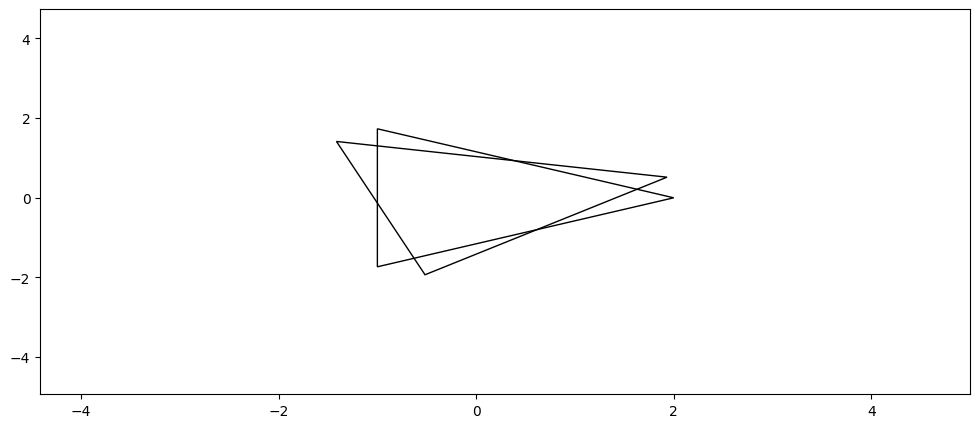

In [ ]:
# Декоратор для автоматического поворота полигона
def tr_rotate_wr(func):
    def wrapper(*args, **kwargs):
        polygon = func(*args, **kwargs)  # Получаем исходный полигон из функции
        return list(map(tr_rotate, polygon))  # Применяем поворот к каждой точке
    return wrapper

# Функция генерации правильного n-угольника с автоматическим поворотом (декорирована)
@tr_rotate_wr
def get_polygon_coords_with_wr(n: int, R: float = 2., x0: float = 0, y0: float = 0):
    polygon = []
    for i in range(n):
        # Вычисляем координаты вершин правильного n-угольника
        polygon.append((x0 + R * cos(2 * pi * i / n), y0 + R * sin(2 * pi * i / n)))
    return polygon

# Генерируем:
# 1. Треугольник с поворотом (через декорированную функцию)
polygon_trans = get_polygon_coords_with_wr(3)  # Повернут на 135° (по умолчанию в tr_rotate)
# 2. Обычный треугольник без поворота
polygon_norms = get_polygon_coords(3)

# Собираем оба полигона для визуального сравнения
polygons = [polygon_trans, polygon_norms]

# Отрисовываем:
plot_poligons(polygons)

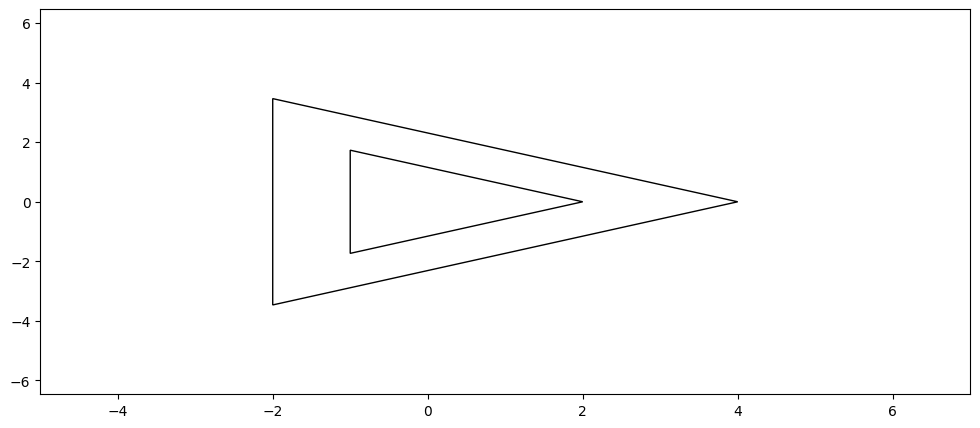

In [ ]:
# Декоратор для автоматического масштабирования (гомотетии) полигона
def tr_homothety_wr(func):
    def wrapper(*args, **kwargs):
        polygon = func(*args, **kwargs)  # Получаем исходный полигон
        return list(map(tr_homotety, polygon))  # Применяем масштабирование к каждой точке
    return wrapper

# Функция генерации правильного n-угольника с автоматическим масштабированием
@tr_homothety_wr
def get_polygon_coords_with_wr(n: int, R: float = 2., x0: float = 0, y0: float = 0):
    polygon = []
    for i in range(n):
        # Вычисляем координаты вершин правильного n-угольника
        polygon.append((x0 + R * cos(2 * pi * i / n), y0 + R * sin(2 * pi * i / n)))
    return polygon

# Генерируем:
# 1. Масштабированный треугольник (через декорированную функцию)
polygon_trans = get_polygon_coords_with_wr(3)  # Масштаб увеличен в 2 раза (по умолчанию в tr_homotety)
# 2. Обычный треугольник без масштабирования
polygon_norms = get_polygon_coords(3)

# Собираем оба полигона для сравнения
polygons = [polygon_trans, polygon_norms]

# Отрисовываем:
plot_poligons(polygons)

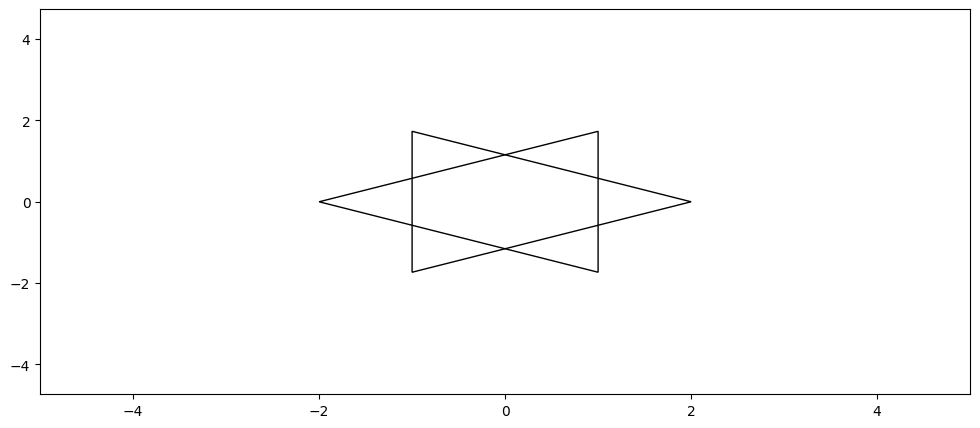

In [ ]:
# Декоратор для автоматического применения симметрии (отражения) к полигону
def tr_symmetry_wr(func):
    def wrapper(*args, **kwargs):
        polygon = func(*args, **kwargs)  # Получаем исходный полигон из функции
        return list(map(tr_symmetry, polygon))  # Применяем симметрию к каждой точке
    return wrapper

# Функция генерации правильного n-угольника с автоматическим отражением (декорирована)
@tr_symmetry_wr
def get_polygon_coords_with_wr(n: int, R: float = 2., x0: float = 0, y0: float = 0):
    polygon = []
    for i in range(n):
        # Вычисляем координаты вершин правильного n-угольника
        polygon.append((x0 + R * cos(2 * pi * i / n), y0 + R * sin(2 * pi * i / n)))
    return polygon

# Генерируем:
# 1. Треугольник с отражением (через декорированную функцию)
polygon_trans = get_polygon_coords_with_wr(3)  # Отражен относительно начала координат
# 2. Обычный треугольник без преобразований
polygon_norms = get_polygon_coords(3)

# Собираем оба полигона для визуального сравнения
polygons = [polygon_trans, polygon_norms]

# Отрисовываем:
plot_poligons(polygons)

7.	Реализовать декораторы и продемонстрировать корректность их работы:

* фильтрующие многоугольники в итераторах среди аргументов функции, работающие на основе функций из п. 5: `@flt_convex_polygon`, `@flt_angle_point`, `@flt_square`, `@flt_short_side`, `@flt_point_inside`, `@flt_polygon_angles_inside`;

* преобразующие многоугольники в итераторах среди аргументов функции, работающие на основе функций из п. 3: `@tr_translate`, `@tr_rotate`, `@tr_symmetry`, `@tr_homothety`.

<font color="Crimson">**обязательная часть: 1 пункт<br>5 пунктов — сложность 1**

8. Реализовать функции и продемонстрировать их корректность:

* поиск угла, самого близкого к началу координат (`agr_origin_nearest`);

* поиск самого длинной стороны многоугольника (`agr_max_side`);

* поиск самой маленькой площади многоугольника (`agr_min_area`);

* расчет суммарного периметра (`agr_perimeter`);

* расчет суммарной площади (`agr_area`);

которые можно применить к последовательности полигонов с помощью функции `functools.reduce`.

<font color="Crimson">**3 пункта — сложность 1<br>5 пунктов — сложность 2**


9. Реализовать функции и продемонстрировать пример их работы (если возможно, с визуализацией):

* склейки полигонов в одну последовательность полигонов из нескольких последовательностей полигонов `zip_polygons(iterator1, iterator2, [iterator3, ...])`. Пример:  

    ```zip_polygons([((1, 1), (2, 2), (3, 1)), ((11, 11), (12, 12), (13, 11))], [((1, -1), (2, -2), (3, -1)), ((11, -11), (12, -12), (13, -11))])``` →

    ```[((1, 1), (2, 2), (3, 1), (1, -1), (2, -2), (3, -1)), ((11, 11), (12, 12), (13, 11), (11, -11), (12, -12), (13, -11))]```.

Альтернативный пример (визуализация) на рис. 4.

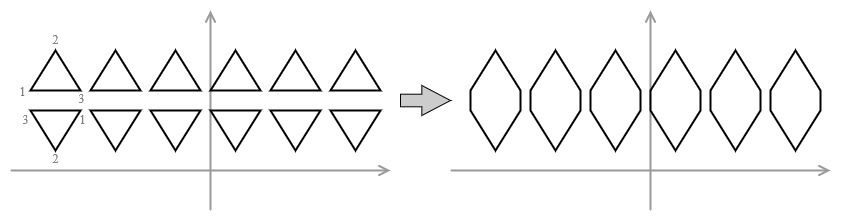

Рисунок 4 — Альтернативный пример склейки полигонов

* генерации `count_2D()` параметры: `(start1, start2)`, `[(step1, step2)]`, результаты: `(start1, start2)`, `(start1+step1, start2+step2)`, `(start1+2*step1, start2+2*step2)`;

* склейки полигонов в одну последовательность полигонов из нескольких последовательностей `zip_tuple(iterator1, iterator2)`. Пример:

    ```zip_tuple([(1,1),  (2,2), (3,3), (4,4)], [(2,2), (3,3), (4,4), (5,5)], [(3,3), (4,4), (5,5), (6,6)])``` →

    ```((1,1),  (2,2), (3,3)), ((2,2), (3,3) (4,4)), ((3,3), (4,4), (5,5)), ((5,5), (6,6), (7,7))```.

<font color="Crimson">**3 пункта — сложность 1**